In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns

In [2]:
case_study=pd.read_csv("Case_Study.csv")

In [3]:
case_study.head()

,Date,Geographic_Region,Platform,Marketing_Channel,Visits,Qualified_Shoppers,Bounced_Visits,Gross_Orders,Net_Orders,Net_Room_Nights
0,1/1/2017,New York,Desktop,Channel 1,3011,1878,811,1139,957,1848
1,1/1/2017,New York,Desktop,Channel 2,119684,82504,26541,12489,10369,19897
2,1/1/2017,New York,Desktop,Channel 3,25612,11828,7398,1399,1139,2257
3,1/1/2017,New York,Desktop,Channel 4,3115,1463,1393,69,50,81
4,1/1/2017,New York,Desktop,Channel 5,5657,4307,1346,641,517,921


In [4]:
len(case_study)

87776

In [5]:
case_study.dtypes

Date                  object
Geographic_Region     object
Platform              object
Marketing_Channel     object
Visits                 int64
Qualified_Shoppers     int64
Bounced_Visits         int64
Gross_Orders           int64
Net_Orders             int64
Net_Room_Nights        int64
dtype: object

In [6]:
case_study.isnull().sum()

Date                  0
Geographic_Region     0
Platform              0
Marketing_Channel     0
Visits                0
Qualified_Shoppers    0
Bounced_Visits        0
Gross_Orders          0
Net_Orders            0
Net_Room_Nights       0
dtype: int64

In [7]:
case_study.Date.unique()

array(['1/1/2017', '2/1/2017', '3/1/2017', ..., '29/12/2019',
       '30/12/2019', '31/12/2019'], dtype=object)

In [8]:
case_study.Platform.unique()

array(['Desktop', 'Mobile'], dtype=object)

In [9]:
case_study.Marketing_Channel.unique()

array(['Channel 1', 'Channel 2', 'Channel 3', 'Channel 4', 'Channel 5',
       'Channel 6', 'Channel 7', 'Channel 8', 'Channel 9', 'Channel 10',
       'Channel 11'], dtype=object)

In [10]:
case_study.Geographic_Region.unique()

array(['New York', 'Los Angeles', 'Dallas', 'Huntsville'], dtype=object)

In [11]:
case_study.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87776 entries, 0 to 87775
Data columns (total 10 columns):
Date                  87776 non-null object
Geographic_Region     87776 non-null object
Platform              87776 non-null object
Marketing_Channel     87776 non-null object
Visits                87776 non-null int64
Qualified_Shoppers    87776 non-null int64
Bounced_Visits        87776 non-null int64
Gross_Orders          87776 non-null int64
Net_Orders            87776 non-null int64
Net_Room_Nights       87776 non-null int64
dtypes: int64(6), object(4)
memory usage: 6.7+ MB


In [12]:
case_study.describe()

,Visits,Qualified_Shoppers,Bounced_Visits,Gross_Orders,Net_Orders,Net_Room_Nights
count,87776.000000,87776.000000,87776.000000,87776.000000,87776.000000,87776.000000
mean,27811.110736,12942.688081,12502.429821,1165.088168,940.076980,1994.250957
std,42476.870217,21942.037066,23045.713549,3159.710456,2551.822861,5502.335941
min,1.000000,0.000000,0.000000,0.000000,-100.000000,-267.000000
25%,4161.750000,1723.750000,1571.000000,75.000000,59.000000,129.000000
50%,12306.000000,5811.500000,4924.000000,329.000000,261.000000,555.000000
75%,33670.000000,15217.250000,13952.000000,1012.000000,807.000000,1659.000000
max,683764.000000,280919.000000,546089.000000,38354.000000,35318.000000,79141.000000


Index(['Date', 'Geographic_Region', 'Platform', 'Marketing_Channel', 'Visits',
       'Qualified_Shoppers', 'Bounced_Visits', 'Gross_Orders', 'Net_Orders',
       'Net_Room_Nights'],
      dtype='object')

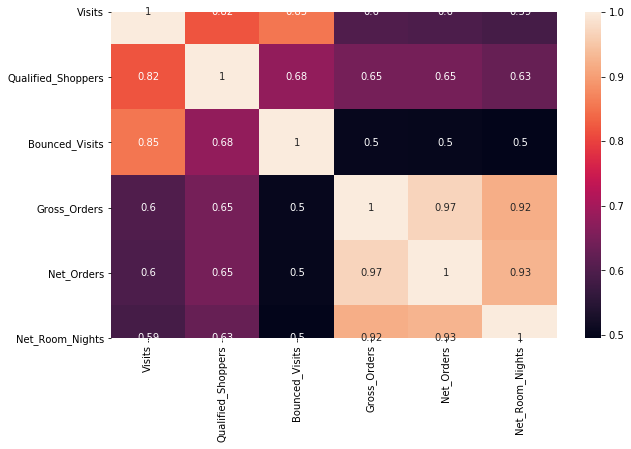

In [13]:
corr = case_study.corr(method='kendall')
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True)
case_study.columns

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score

In [15]:
from datetime import datetime

case_study["D1"] = pd.to_datetime(case_study['Date'], format = '%d/%m/%Y')

In [16]:
#Defining the independent variables and dependent variables
x = case_study.iloc[:,[4,5,6,7,8]]
y = case_study['Net_Room_Nights']
#Getting Test and Training Set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=353)
x_train.head()
y_train.head()

7775     1366
33609     125
67936    2415
63633      50
24874      25
Name: Net_Room_Nights, dtype: int64

In [17]:
x_train.shape

(78998, 5)

In [18]:
x_test.shape

(8778, 5)

In [19]:
#Prepare a Linear Regression Model
reg=LinearRegression()
reg.fit(x_train, y_train)
y_pred=reg.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9886767459884487